## Create PCA of SES for the Toronto region

First some initial data loading and setup

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn import decomposition

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/all_data_2016_CTs_V3.csv")
df = df.loc[(df["ct_year"] != "x")]
df = df.loc[(df["cma"] == 535)]
#df.to_csv("temp.csv")
#df.columns
df

/home/jamaps/miniconda3/envs/map/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ct_year,ctuid,pop,dw,inc_avg_inc,inc_avg_inc_16,na_flag,na_pop_flag,na_sup_flag,pop_immig,...,area_km,pop_child_prop,pop_elderly_prop,dw_lone_prop,pop_no_high_school_prop,Ai_combine,inc_avg_inc_16_logged,pop_density,R_activities_per_day,cma
85,1991_5350001.00,5350001.00,618.0,215.0,39093.00,60594.15,0.0,0,0.0,0.056634,...,6.10,0.169903,0.097087,0.333333,0.481481,0.362961,11.011954,101.311475,0.000000,535.0
86,1991_5350002.00,5350002.00,592.0,245.0,41002.00,63553.10,0.0,0,0.0,0.000000,...,3.17,0.211149,0.084459,0.250000,0.229167,0.233365,11.059631,186.750789,1.440000,535.0
87,1991_5350003.00,5350003.00,0.0,0.0,NaN,NaN,2.0,1,1.0,NaN,...,0.91,NaN,NaN,NaN,NaN,0.340347,NaN,0.000000,1.121959,535.0
88,1991_5350004.00,5350004.00,7050.0,3395.0,29558.00,45814.90,0.0,0,0.0,0.234043,...,0.34,0.129787,0.108511,0.207885,0.390795,0.455281,10.732365,20735.294118,1.126957,535.0
89,1991_5350005.00,5350005.00,5087.0,2140.0,32812.00,50858.60,0.0,0,0.0,0.214272,...,0.38,0.162178,0.113033,0.320000,0.389157,0.455281,10.836805,13386.842105,1.126957,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,2016_5350820.07,5.35082e+06,4002.0,1280.0,167464.96,167464.96,0.0,0,0.0,0.011244,...,1.33,0.147316,0.099875,0.157895,0.144300,0.221598,12.028529,3009.022556,1.423013,535.0
8229,2016_5350830.00,5.35083e+06,4596.0,1595.0,152394.80,152394.80,0.0,0,0.0,0.006527,...,186.55,0.132753,0.171926,0.084806,0.154131,0.025394,11.934230,24.636827,1.396162,535.0
8230,2016_5350831.01,5.35083e+06,5750.0,2030.0,143220.24,143220.24,0.0,0,0.0,0.004348,...,12.10,0.179130,0.139130,0.140719,0.142402,0.046992,11.872139,475.206612,1.211038,535.0
8231,2016_5350831.02,5.35083e+06,6780.0,2625.0,117939.20,117939.20,0.0,0,0.0,0.008112,...,17.59,0.154867,0.228614,0.135204,0.137838,0.049569,11.677925,385.446276,1.436510,535.0


Pull out variables that will be used for the PCA

In [3]:
df_pca = df[[
    "ct_year",
    'year',
    "pop",
    "pop_density",
    "pop_immig",
    "pop_nodegree",
    "pop_no_high_school_prop",
    "pop_unemployed",
    "pop_elderly_prop",
    "inc_lico_p",
    "inc_total30p",
    "inc_avg_inc_16_logged",
    "dw_majorrep",
    "dw_lone_prop"    
]]
df_pca = df_pca.dropna()


Showing a correlation matrix of these selected variables

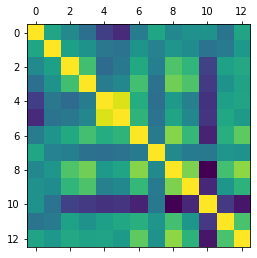

In [4]:
import matplotlib.pyplot as plt
#print(df_pca.corr())
plt.matshow(df_pca.corr())
plt.show()

Examining PCA results for different number of components by printing the variaance explained for each additional component

In [5]:
k = 1
while k <= 8:
    data_pca = df_pca[["inc_avg_inc_16_logged","inc_lico_p","inc_total30p","dw_majorrep","dw_lone_prop","pop_immig","pop_no_high_school_prop","pop_unemployed"]]
    data_pca = sklearn.preprocessing.StandardScaler().fit_transform(data_pca)
    pca = sklearn.decomposition.PCA(n_components=k)
    principalComponents = pca.fit_transform(data_pca)
    principal_SES = pd.DataFrame(data = principalComponents
                 , index=df_pca.index)
    print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))
    k += 1


[0.52444737] 0.5244473682301614
[0.52444737 0.15244369] 0.6768910628470186
[0.52444737 0.15244369 0.10318188] 0.7800729455131642
[0.52444737 0.15244369 0.10318188 0.06806389] 0.8481368391862214
[0.52444737 0.15244369 0.10318188 0.06806389 0.06596607] 0.914102912470597
[0.52444737 0.15244369 0.10318188 0.06806389 0.06596607 0.04420262] 0.9583055363279513
[0.52444737 0.15244369 0.10318188 0.06806389 0.06596607 0.04420262
 0.02316427] 0.9814698104098296
[0.52444737 0.15244369 0.10318188 0.06806389 0.06596607 0.04420262
 0.02316427 0.01853019] 1.0


Decide on generating 3 components, and save to a dataframe

In [6]:
data_pca = df_pca[["inc_avg_inc_16_logged","inc_lico_p","inc_total30p","dw_majorrep","dw_lone_prop","pop_immig","pop_no_high_school_prop","pop_unemployed"]]
data_pca = sklearn.preprocessing.StandardScaler().fit_transform(data_pca)
pca = sklearn.decomposition.PCA(n_components=3)
principalComponents = pca.fit_transform(data_pca)
principal_SES = pd.DataFrame(data = principalComponents, columns = ['ses_pc1', 'ses_pc2','ses_pc3']
             , index=df_pca.index)
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

df_pca_o = df_pca.join(principal_SES)

[0.52444737 0.15244369 0.10318188] 0.7800729455131643


In [7]:
# printing the component weights
pca.components_

array([[-0.4282032 ,  0.45102992,  0.32897081,  0.28002348,  0.37531935,
         0.30420473,  0.21194421,  0.38503715],
       [ 0.10911421,  0.13083405,  0.44283174, -0.41594662, -0.1431143 ,
         0.49529931, -0.57823657, -0.04128392],
       [ 0.11235256,  0.08867293, -0.04159316,  0.50517337,  0.44031974,
        -0.24487517, -0.65961396, -0.18343389]])

In [8]:
# set the first component to be SESi
df_pca_o["SESi"] = -df_pca_o["ses_pc1"]

Generating some simple descriptive stats and plots of SESi

/home/jamaps/miniconda3/envs/map/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    6.514000e+03
mean     1.745269e-17
std      2.048468e+00
min     -9.275272e+00
25%     -1.268729e+00
50%      3.520149e-01
75%      1.589398e+00
max      4.756659e+00
Name: SESi, dtype: float64

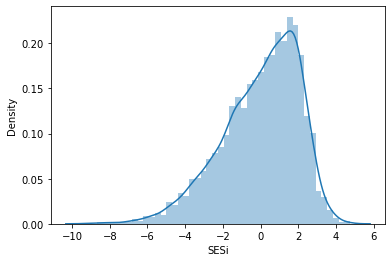

In [9]:
sns.distplot(df_pca_o["SESi"]);
df_pca_o["SESi"].describe()

In [10]:
sklearn.preprocessing.StandardScaler().fit_transform(df_pca_o[["SESi"]])

array([[-1.61048369],
       [-0.80467145],
       [-2.41674547],
       ...,
       [ 1.04696928],
       [ 1.07852212],
       [ 0.91644133]])

<AxesSubplot:xlabel='inc_lico_p', ylabel='SESi'>

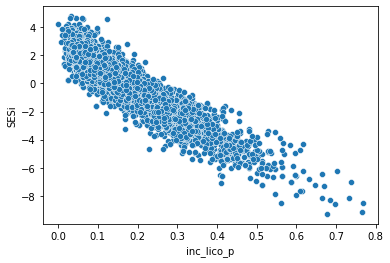

In [11]:
sns.scatterplot(x="inc_lico_p", y="SESi", data=df_pca_o)

Generate table of population weighted mean of SES by year

In [12]:
df_pca_o["SES_x_pop"] = df_pca_o["SESi"] * df_pca_o["pop"]

temp = df_pca_o.groupby('year').agg({'pop': 'sum', 'SES_x_pop': 'sum'})
temp["wm"] = temp["SES_x_pop"] / temp["pop"] 
temp

,pop,SES_x_pop,wm
year,,,
1991,3.777038e+06,-3.476168e+05,-0.092034
1996,4.119648e+06,-4.118381e+06,-0.999692
2001,4.491697e+06,5.039663e+05,0.112200
2006,4.870532e+06,-1.821898e+05,-0.037407
2011,5.295000e+06,-5.793883e+04,-0.010942
2016,5.608448e+06,5.153593e+05,0.091890


In [13]:
# saving to file
# df_pca_o[["ct_year","SESi"]].to_csv("data/PCA_SES_Toronto.csv")

Setting up data to creat a violin plot of SES by year

In [17]:
oot = []
for index, row in df_pca_o.iterrows():
    pop = row['pop']
    SES = row['SESi']
    year = row['year']
    while pop > 0:
        oot.append([year,SES])
        pop = pop - 10

In [18]:
dfv = pd.DataFrame(oot)
dfv.columns = ['year', 'SESi']

<AxesSubplot:xlabel='year', ylabel='SESi'>

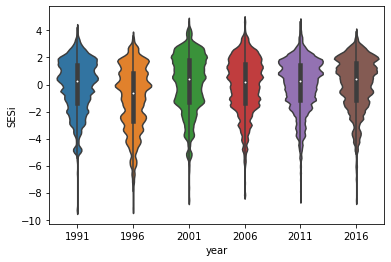

In [23]:
sns.violinplot(x="year", y="SESi", data=dfv) # , width = 1
# plt.savefig('temp.svg')